<a href="https://colab.research.google.com/github/JAYANTHNITW/Evolutionary_Computation_Algorithms/blob/main/GeneticAlgorithm_NeuralNetwork_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Episode 57. Genetic Algorithm: Neural Networks
Boston housing prices -2 hidden layers

## Data: Boston Housing Prices
### Keras Built-in function - https://keras.io/api/datasets/boston_housing/
### Excel file form Kaggle - https://www.kaggle.com/fedesoriano/the-boston-houseprice-data

Original Data - http://lib.stat.cmu.edu/datasets/boston

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per USD 10,000

PTRATIO - pupil-teacher ratio by town

B - 1000*(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Step 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import random
import math
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Step 2. Load Data

In [2]:
# Load Loan Default Data
# Original Data Source: https://www.kaggle.com/fedesoriano/the-boston-houseprice-data
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [9]:
# Store data in DataFrame
df = pd.read_csv("boston.csv")

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

## Step 3. Set Training Variables

In [11]:
RANDOM_SEED = 27
# split data
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
y_train = X_train['MEDV']
X_train = X_train.drop(['MEDV'], axis=1)
y_test = X_test['MEDV']
X_test = X_test.drop(['MEDV'], axis=1)

In [12]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
168,2.30040,0.0,19.58,0,0.605,6.319,96.1,2.1000,5,403.0,14.7,297.09,11.10
475,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666.0,20.2,302.76,24.10
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277.0,18.6,395.24,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.26169,0.0,9.90,0,0.544,6.023,90.4,2.8340,4,304.0,18.4,396.30,11.72
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307.0,21.0,376.73,13.04
328,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430.0,16.9,382.44,9.97
184,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193.0,17.8,391.00,13.98


In [13]:
X_train.mean(axis=0)

CRIM         3.308947
ZN          11.086634
INDUS       11.022203
CHAS         0.061881
NOX          0.552220
RM           6.281295
AGE         68.848020
DIS          3.842028
RAD          9.349010
TAX        405.603960
PTRATIO     18.411881
B          357.972797
LSTAT       12.658688
dtype: float64

In [14]:
# Standardize data based on mean & sd of X_train
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# convert to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [15]:
X_train.shape

(404, 13)

## Step 4. Setup Neural Network

In [16]:
# Network Parameters
max_node = 5
num_hiddenlayers = 2
nn_in = X_train.shape[1]
nn_hidden1 = max_node
nn_hidden2 = max_node
nn_out = 1

In [17]:
def network(nn_in, nn_hidden1, nn_hidden2, nn_out):
  model = Sequential()
  model.add(Dense(nn_hidden1, input_dim=nn_in, activation='relu'))
  model.add(Dense(nn_hidden2, activation='relu'))
  model.add(Dense(nn_out, activation='linear'))
  # compile model
  model.compile(loss='mse', optimizer='adam', metrics=['mae'])
  return model

In [25]:
model = Sequential()
model.add(Dense(nn_hidden1, input_dim=nn_in, activation='relu'))
model.add(Dense(nn_hidden2, activation='relu'))
model.add(Dense(nn_out, activation='linear'))
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [23]:
from keras.utils import plot_model

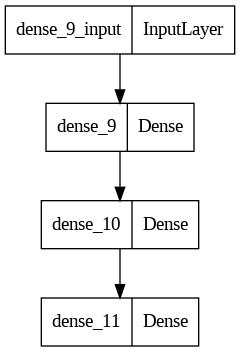

In [26]:
plot_model(model)

## Step 5. Run Single Episode

In [27]:
def run_episode(X_train,y_train,X_test,y_test,nn_in,nn_out, policy):
  nn_hidden1,nn_hidden2 = policy
  # build model
  model = network(nn_in, nn_hidden1, nn_hidden2, nn_out)
  # train model
  model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.05)
  # performance
  _, accuracy = model.evaluate(X_test, y_test)
  print(_)
  return accuracy

In [28]:
# test model 1
policy = [5,2]
acc1 = run_episode(X_train,y_train,X_test,y_test,nn_in,nn_out, policy)

# test model 2
policy = [2,5]
acc2 = run_episode(X_train,y_train,X_test,y_test,nn_in,nn_out, policy)

# test model 3
policy = [5,5]
acc3 = run_episode(X_train,y_train,X_test,y_test,nn_in,nn_out, policy)

print("Model 1:", acc1, "Model 2:", acc2, "Model 3:", acc3)

4/4 [==============================] - 0s 4ms/step - loss: 32.7973 - mae: 4.0314
32.79726028442383
4/4 [==============================] - 0s 5ms/step - loss: 43.7698 - mae: 4.7051
43.769805908203125
4/4 [==============================] - 0s 5ms/step - loss: 40.4767 - mae: 4.6884
40.47673416137695
Model 1: 4.031449794769287 Model 2: 4.705146789550781 Model 3: 4.688449859619141


## Step 6. Policy Functions: Genetic Algorithm

In [29]:
def evaluate_policy(X_train,y_train,X_test,y_test,nn_in,nn_out, policy, n_episodes=1):
  total_rewards = 0.0
  for _ in range(n_episodes):
    total_rewards += 1/run_episode(X_train,y_train,X_test,y_test,nn_in,nn_out, policy)
  return total_rewards / n_episodes

In [30]:
def gen_random_policy(max_node,num_hiddenlayers):
  return np.random.choice(max_node+1, size=((num_hiddenlayers)))

In [31]:
def crossover(policy1, policy2,num_hiddenlayers):
  new_policy = policy1.copy()
  for i in range(num_hiddenlayers):
    rand = np.random.uniform()
    if rand > 0.5:
      new_policy[i] = policy2[i]
  return new_policy

In [32]:
def mutation(policy,num_hiddenlayers,max_node, p=0.05):
  new_policy = policy.copy()
  for i in range(num_hiddenlayers):
    rand = np.random.uniform()
    if rand < p:
      new_policy[i] = np.random.choice(max_node+1)
  return new_policy

In [33]:
if __name__ == '__main__':
    random.seed(1234)
    np.random.seed(1234)

    ## Policy search
    n_policy = 10
    n_steps = 5
    start = time.time()
    policy_pop = [gen_random_policy(max_node,num_hiddenlayers) for _ in range(n_policy)]
    for idx in range(n_steps):
        policy_scores = [evaluate_policy(X_train,y_train,X_test,y_test,nn_in,nn_out, p) for p in policy_pop]
        print('Generation %d : MaxScore=%0.2f & AvgScore=%0.3f' %(idx+1, max(policy_scores), sum(policy_scores)/len(policy_scores)))
        policy_ranks = list(reversed(np.argsort(policy_scores)))
        elite_set = [policy_pop[x] for x in policy_ranks[:5]]
        select_probs = np.array(policy_scores) / np.sum(policy_scores)
        if np.sum(policy_scores)==0:
            pp = 1/np.array(policy_scores).size
            select_probs = pp*np.ones(np.array(policy_scores).size)
        child_set = [crossover(
            policy_pop[np.random.choice(range(n_policy), p=select_probs)],
            policy_pop[np.random.choice(range(n_policy), p=select_probs)],num_hiddenlayers)
            for _ in range(n_policy - 5)]
        mutated_list = [mutation(p,num_hiddenlayers,max_node) for p in child_set]
        policy_pop = elite_set
        policy_pop += mutated_list
    policy_score = [evaluate_policy(X_train,y_train,X_test,y_test,nn_in,nn_out, p) for p in policy_pop]
    best_policy = policy_pop[np.argmax(policy_score)]

    end = time.time()
    print('Best policy score=%0.2f Time taken(seconds)=%4.4f Average Score=%0.3f'
            %(np.max(policy_score), (end-start), sum(policy_score)/len(policy_score)))
    #print("Success Rate(%): ", sum(policy_score)/len(policy_score))
    print("Best Policy is:", best_policy)

4/4 [==============================] - 0s 4ms/step - loss: 38.8470 - mae: 4.3774
38.84703063964844
4/4 [==============================] - 0s 4ms/step - loss: 27.6848 - mae: 3.7441
27.684804916381836
4/4 [==============================] - 0s 6ms/step - loss: 546.1508 - mae: 21.3436
546.1507568359375
4/4 [==============================] - 0s 4ms/step - loss: 546.1412 - mae: 21.3434
546.1411743164062
4/4 [==============================] - 0s 4ms/step - loss: 39.9414 - mae: 4.4566
39.94140625
4/4 [==============================] - 0s 4ms/step - loss: 28.8201 - mae: 4.0486
28.820058822631836
4/4 [==============================] - 0s 4ms/step - loss: 114.3366 - mae: 7.9633
114.3366470336914
4/4 [==============================] - 0s 3ms/step - loss: 598.0883 - mae: 22.5275
598.0882568359375
4/4 [==============================] - 0s 4ms/step - loss: 30.9254 - mae: 3.9714
30.92538833618164
4/4 [==============================] - 0s 3ms/step - loss: 546.1508 - mae: 21.3436
546.1507568359375
Gener